In [1]:
!pip install fasttext scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
import fasttext
from gensim.models import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
cd drive/MyDrive/курсова

/content/drive/MyDrive/курсова


In [5]:
ls

cc.pl.300.bin  cognates.py                    main.ipynb          ukr_pol_ds.py
cc.uk.300.bin  false_friends_detection.ipynb  modified.csv        ukr_pol.py
cognates.csv   false-friends_sp-pr.pdf        tyhrolovy_vecs.bin


## Loading language vectors

In [6]:
model_uk = fasttext.load_model('cc.uk.300.bin')

In [6]:
model_pl = fasttext.load_model('cc.pl.300.bin')

## Vector exploration

In [ ]:
word_vectors = model_pl.get_word_vector('pies')

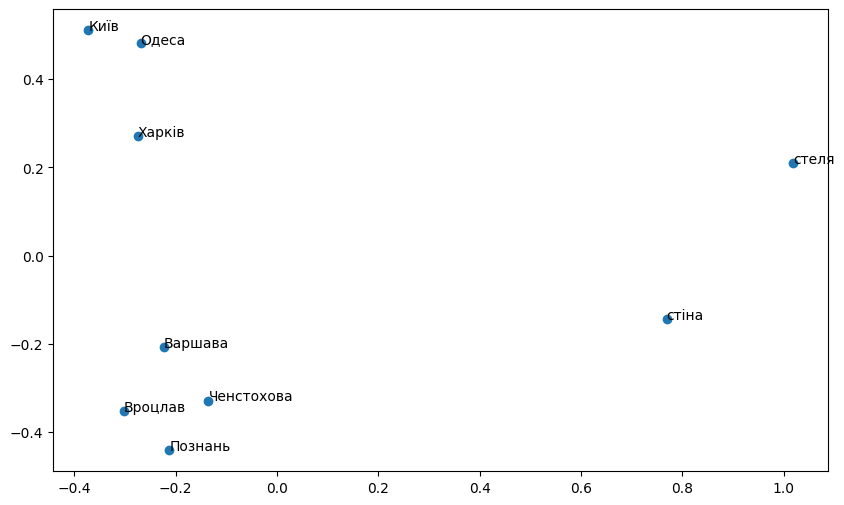

In [35]:
uk_vectors = ["Варшава", "Познань", "Одеса", "Харків", "Вроцлав","Ченстохова", "Київ", "стіна", "стеля"]

word_vectors_subset = [model_uk.get_word_vector(word) for word in uk_vectors]

# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


# Add labels for each word
for i, word in enumerate(uk_vectors):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

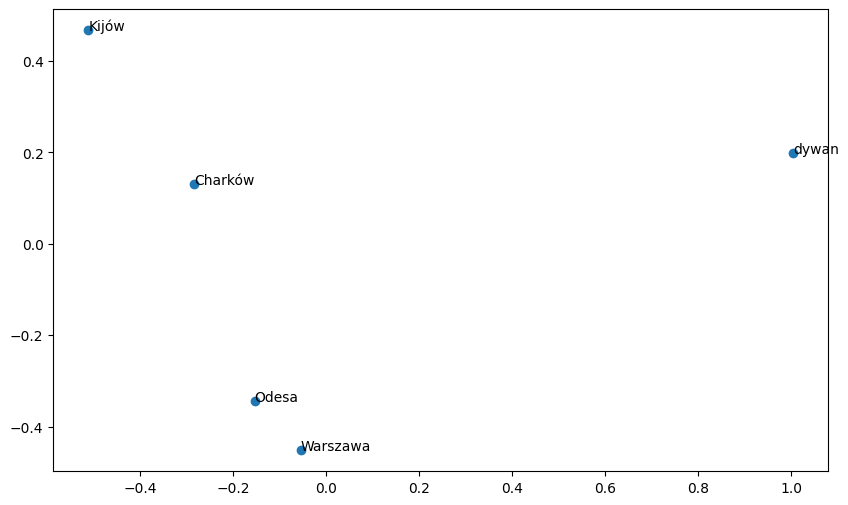

In [11]:
pl_vectors = ['Kijów', 'Charków', 'Odesa', 'Warszawa', 'dywan']


word_vectors_subset = [model_pl.get_word_vector(word) for word in pl_vectors]

# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


# Add labels for each word
for i, word in enumerate(pl_vectors):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

In [ ]:
word_vectors_subset = [model_pl.get_word_vector(word) for word in words_to_visulaize]


In [ ]:
def spatialDistance(vector1, vector2):
    return spatial.distance.euclidean(vector1, vector2)

spatialDistance(word_vectors_subset[1], word_vectors_subset[2])

1.160095453262329

In [ ]:
# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

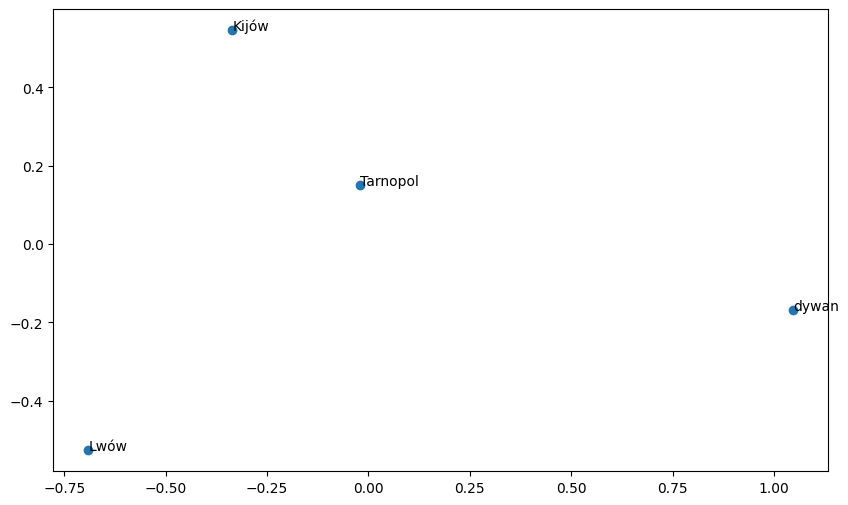

In [ ]:
# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Add labels for each word
for i, word in enumerate(words_to_visulaize):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

In [ ]:
model_pl.get_nearest_neighbors('Tarnopol', k=20)

[(0.6619117259979248, 'Tarnopo'),
 (0.6609591841697693, 'Tarnopolskie'),
 (0.6594625115394592, 'Tarnopolski'),
 (0.6581240296363831, 'TarnopolNywa'),
 (0.6484225392341614, 'Lwów'),
 (0.6367254853248596, 'Żytomierz'),
 (0.6298438906669617, 'tarnopolski'),
 (0.6296219229698181, 'TarnopolFK'),
 (0.6280732154846191, 'Tarnopolskim'),
 (0.6194287538528442, 'Tarnopola'),
 (0.6168087124824524, 'WęgryTarnopol'),
 (0.61272794008255, 'Tarnopolu'),
 (0.6102651953697205, 'Brzeżany'),
 (0.6044431328773499, 'Rohatyn'),
 (0.59547358751297, 'Tarnopolskiem'),
 (0.5941257476806641, 'Złoczów'),
 (0.5906077027320862, 'Tarnopolska'),
 (0.5902125239372253, 'tarnopolskie'),
 (0.5867614150047302, 'Podhajce'),
 (0.5865432620048523, 'Żydaczów')]

In [ ]:
model_uk.get_word_vector('машина').shape

(300,)

In [41]:
model_uk.get_analogies('Варшава', 'Польща', 'Україна')

[(0.6110314130783081, 'Київ'),
 (0.6055029630661011, 'Москва'),
 (0.5506971478462219, 'Одеса'),
 (0.5502026081085205, 'Київ-Варшава'),
 (0.539129912853241, 'Харків-Варшава'),
 (0.5382523536682129, 'Київ-Нью-Йорк'),
 (0.5381291508674622, 'Львів-Варшава'),
 (0.5311408638954163, 'Європа'),
 (0.529330849647522, 'Україна2'),
 (0.5263713598251343, 'Київ-Прага')]

In [ ]:
model_uk.get_analogies('Київ', 'Україна', 'Японія')

[(0.6316195130348206, 'Токіо'),
 (0.5954586863517761, 'Кіото'),
 (0.5291852951049805, 'Токіо-Наріта'),
 (0.5268515348434448, 'Япон'),
 (0.5254097580909729, 'Хамамацу'),
 (0.5220339298248291, 'Нагоя'),
 (0.520989179611206, 'Кітакюсю'),
 (0.5202122330665588, 'Японіі'),
 (0.519186794757843, 'Токіомі'),
 (0.5158222913742065, 'Кобе')]

### Pipeline
1. text in l1 and l2 is given as input
2. the text is preprocessed to get lemmas and content words
3. output context words
4. candidate selection
5. fasttext vectors and multilingual dictionaries to align english french  embeddings to italian ones
6. ccosine similarity between semantic vector spaces of Wit and Wl from the aligned semantic spaces


In [ ]:

# Python3 implementation of above approach
from math import floor, ceil

# Function to calculate the
# Jaro Similarity of two s
def jaro_distance(s1, s2):

    # If the s are equal
    if (s1 == s2):
        return 1.0

    # Length of two s
    len1 = len(s1)
    len2 = len(s2)

    # Maximum distance upto which matching
    # is allowed
    max_dist = floor(max(len1, len2) / 2) - 1

    # Count of matches
    match = 0

    # Hash for matches
    hash_s1 = [0] * len(s1)
    hash_s2 = [0] * len(s2)

    # Traverse through the first
    for i in range(len1):

        # Check if there is any matches
        for j in range(max(0, i - max_dist),
                       min(len2, i + max_dist + 1)):

            # If there is a match
            if (s1[i] == s2[j] and hash_s2[j] == 0):
                hash_s1[i] = 1
                hash_s2[j] = 1
                match += 1
                break

    # If there is no match
    if (match == 0):
        return 0.0

    # Number of transpositions
    t = 0
    point = 0

    # Count number of occurrences
    # where two characters match but
    # there is a third matched character
    # in between the indices
    for i in range(len1):
        if (hash_s1[i]):

            # Find the next matched character
            # in second
            while (hash_s2[point] == 0):
                point += 1

            if (s1[i] != s2[point]):
                t += 1
            point += 1
    t = t//2

    # Return the Jaro Similarity
    return (match/ len1 + match / len2 +
            (match - t) / match)/ 3.0

# Driver code
s1 = "утро"
s2 = "ютро"

# Prjaro Similarity of two s
print(round(jaro_distance(s1, s2),6))

# This code is contributed by mohit kumar 29

0.833333


In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393324 sha256=254980f7ba1973335fa76d8bcbd7d0bfab7bd78539842f1b4ce073161f71804f
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext